# Technical Analysis using Pandas library [pandas-ta](https://pypi.org/project/pandas-ta/)

In [1]:
import pandas as pd
import pandas_ta as pta
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import time
%matplotlib inline

In [2]:
metrics_eth = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/eth_annual_metrics/combined.csv', index_col='time')
metrics_eth = metrics_eth.reset_index()
metrics_eth['time'] = pd.to_datetime(metrics_eth['time']).dt.date
metrics_eth = metrics_eth.set_index('time').drop(columns='Unnamed: 0')

metrics_eth.tail()

,asset,AdrActCnt,CapMVRVCur,CapMrktCurUSD,HashRate,NVTAdj,PriceUSD,SplyCur,TxCnt,TxTfrValAdjUSD,VelCur1yr
time,,,,,,,,,,,
2021-07-31,eth,617087,1.733664,2.974903e+11,529.372834,37.374311,2544.375376,1.169207e+08,1212322,7.959753e+09,22.283453
2021-08-01,eth,611381,1.739536,2.997877e+11,537.360990,54.531904,2563.737531,1.169339e+08,1190618,5.497474e+09,22.271858
2021-08-02,eth,648782,1.763162,3.062894e+11,548.166186,48.900070,2619.040999,1.169472e+08,1269470,6.263579e+09,22.258925
2021-08-03,eth,599206,1.705551,2.939115e+11,557.910614,40.842571,2512.915292,1.169604e+08,1219663,7.196205e+09,22.253252
2021-08-04,eth,605815,1.794226,3.190962e+11,562.148424,37.550755,2727.934254,1.169736e+08,1223841,8.497730e+09,22.250033


# Relative Strength Index - RSI

In [3]:
rsi_eth = pta.rsi(metrics_eth['PriceUSD'],length=14).dropna()
rsi_eth
rsi_eth.to_csv('resources/rsi_eth.csv')

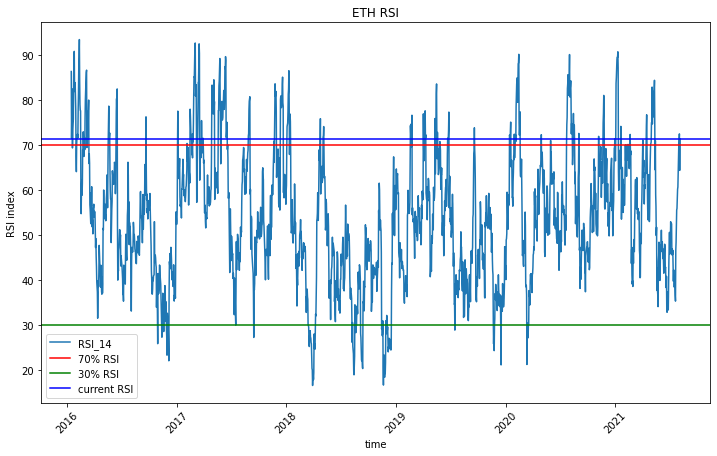

In [4]:
rsi_eth.plot(title = 'ETH RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_eth.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

In [5]:
metrics_btc = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/btc_annual_metrics/combined.csv', index_col='time')
metrics_btc = metrics_btc.reset_index()
metrics_btc['time'] = pd.to_datetime(metrics_btc['time']).dt.date
metrics_btc = metrics_btc.set_index('time').drop(columns='Unnamed: 0')

metrics_btc.tail()

,asset,AdrActCnt,CapMVRVCur,CapMrktCurUSD,HashRate,NVTAdj,PriceUSD,SplyCur,TxCnt,TxTfrValAdjUSD,VelCur1yr
time,,,,,,,,,,,
2021-07-31,btc,720022,2.098153,7.845650e+11,1.126706e+08,178.651798,41793.313748,1.877250e+07,204354,4.391587e+09,11.383878
2021-08-01,btc,695892,2.006838,7.503559e+11,1.109758e+08,88.007444,39968.968954,1.877346e+07,190234,8.526051e+09,11.373743
2021-08-02,btc,899861,1.972934,7.379108e+11,1.030490e+08,101.382469,39304.186284,1.877436e+07,236019,7.278485e+09,11.491496
2021-08-03,btc,820918,1.922865,7.188885e+11,1.217851e+08,82.308751,38288.825398,1.877541e+07,246833,8.734047e+09,11.454489
2021-08-04,btc,842870,1.995698,7.468054e+11,9.800460e+07,57.964298,39773.911349,1.877626e+07,237723,1.288389e+10,11.498698


In [6]:
rsi_btc = pta.rsi(metrics_btc['PriceUSD'],length=14).dropna()
rsi_btc
rsi_btc.to_csv('resources/rsi_btc.csv')

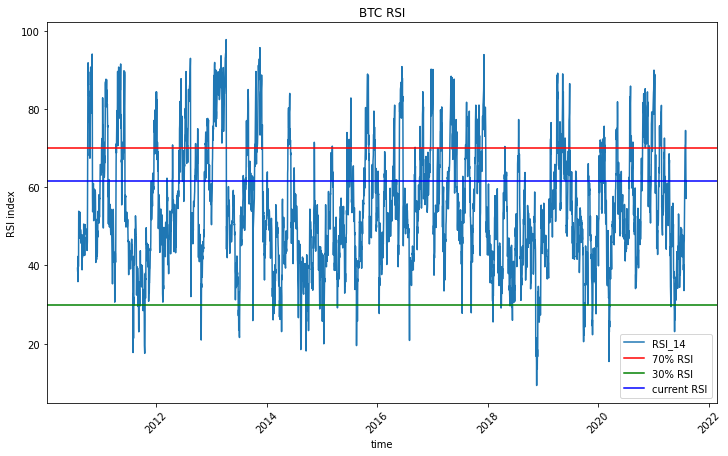

In [7]:
rsi_btc.plot(title = 'BTC RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_btc.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

# Rate of Change - ROC

In [8]:
roc_eth = pta.roc(metrics_eth['PriceUSD'],length=14).dropna()
roc_eth.to_csv('resources/roc_eth.csv')
roc_eth.head()

time
2016-01-15    40.257836
2016-01-16    27.558185
2016-01-17    36.974993
2016-01-18    54.341493
2016-01-19    43.544091
Name: ROC_14, dtype: float64

In [9]:
roc_btc = pta.roc(metrics_btc['PriceUSD'],length=14).dropna()
roc_btc.to_csv('resources/roc_btc.csv')
roc_btc.head()


time
2010-08-01   -28.821062
2010-08-02   -25.742574
2010-08-03   -19.700856
2010-08-04   -28.003890
2010-08-05     4.327433
Name: ROC_14, dtype: float64

# Stochastic RSI - STOCHRSI

In [10]:
stochrsi_btc = pta.stochrsi(metrics_eth['PriceUSD'],length=14).dropna()
stochrsi_btc.to_csv('resources/stochrsi_eth.csv')
stochrsi_btc.head()

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
time,,
2016-02-01,13.127231,32.188508
2016-02-02,7.618306,17.061722
2016-02-03,17.167744,12.637760
2016-02-04,27.185022,17.323691
2016-02-05,29.938053,24.763606


In [11]:
stochrsi_btc = pta.stochrsi(metrics_btc['PriceUSD'],length=14).dropna()
stochrsi_btc.to_csv('resources/stochrsi_btc.csv')
stochrsi_btc.head()

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
time,,
2010-08-18,82.573089,77.100607
2010-08-19,82.553215,80.989379
2010-08-20,68.967190,78.031165
2010-08-21,61.814612,71.111672
2010-08-22,46.311484,59.031095


# Money Flow Index - MFI

In [12]:
eth_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/ETH-USD.csv', parse_dates=True, index_col='Date')
eth_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [13]:
btc_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/BTC-USD.csv', parse_dates=True, index_col='Date')
btc_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [14]:
mfi_eth = pta.volume.mfi(eth_history['High'],eth_history['Low'],eth_history['Close'], eth_history['Volume'])
mfi_eth.to_csv('resources/mfi_eth.csv')
mfi_eth.tail()

Date
2021-08-02    86.588695
2021-08-03    83.045474
2021-08-04    83.688864
2021-08-05    84.817144
2021-08-06    84.070572
Name: MFI_14, dtype: float64

In [15]:
mfi_btc = pta.volume.mfi(btc_history['High'],btc_history['Low'],btc_history['Close'], btc_history['Volume'])
mfi_btc.to_csv('resources/mfi_btc.csv')
mfi_btc.tail()

Date
2021-08-02    81.204203
2021-08-03    79.522234
2021-08-04    79.662530
2021-08-05    80.643163
2021-08-06    79.699408
Name: MFI_14, dtype: float64

# Stochastic Oscilator - STOCH

In [16]:
stoch_eth = pta.stoch(eth_history['Close'],eth_history['High'],eth_history['Low'],length=14).dropna()
stoch_eth.to_csv('resources/stoch_eth.csv')
stoch_eth.head()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2015-08-24,40.927698,47.422852
2015-08-25,15.583200,37.190149
2015-08-26,-9.154127,15.785590
2015-08-27,-16.621943,-3.397623
2015-08-28,-14.739759,-13.505276


In [17]:
stoch_btc = pta.stoch(btc_history['Close'],btc_history['High'],btc_history['Low'],length=14).dropna()
stoch_btc.to_csv('resources/stoch_btc.csv')
stoch_btc.head()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2014-10-04,-37.509344,-25.445139
2014-10-05,-48.047226,-35.980253
2014-10-06,-50.582789,-45.379786
2014-10-07,-39.987669,-46.205895
2014-10-08,-26.924530,-39.164996


# True Strength Index - TSI

In [ ]:
tsi_eth = pta.tsi(metrics_eth['PriceUSD']).dropna()
tsi_eth.to_csv('resources/tsi_eth.csv')
tsi_eth.head()

In [21]:
tsi_btc = pta.tsi(metrics_btc['PriceUSD']).dropna()
tsi_btc.to_csv('resources/tsi_btc.csv')
tsi_btc.head()

,TSI_13_25_13,TSIs_13_25_13
time,,
2010-07-19,-100.000000,-100.000000
2010-07-20,-100.000000,-100.000000
2010-07-21,-98.061612,-99.723087
2010-07-22,-96.664148,-99.286096
2010-07-23,-94.755411,-98.638855
